In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [33]:
data=pd.read_csv('winequalityN.csv')

In [34]:
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [36]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [37]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [38]:
for i, j in data.items():
  if i != 'type':
    data[i]=data[i].fillna(data[i].mean())

In [39]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#EDA

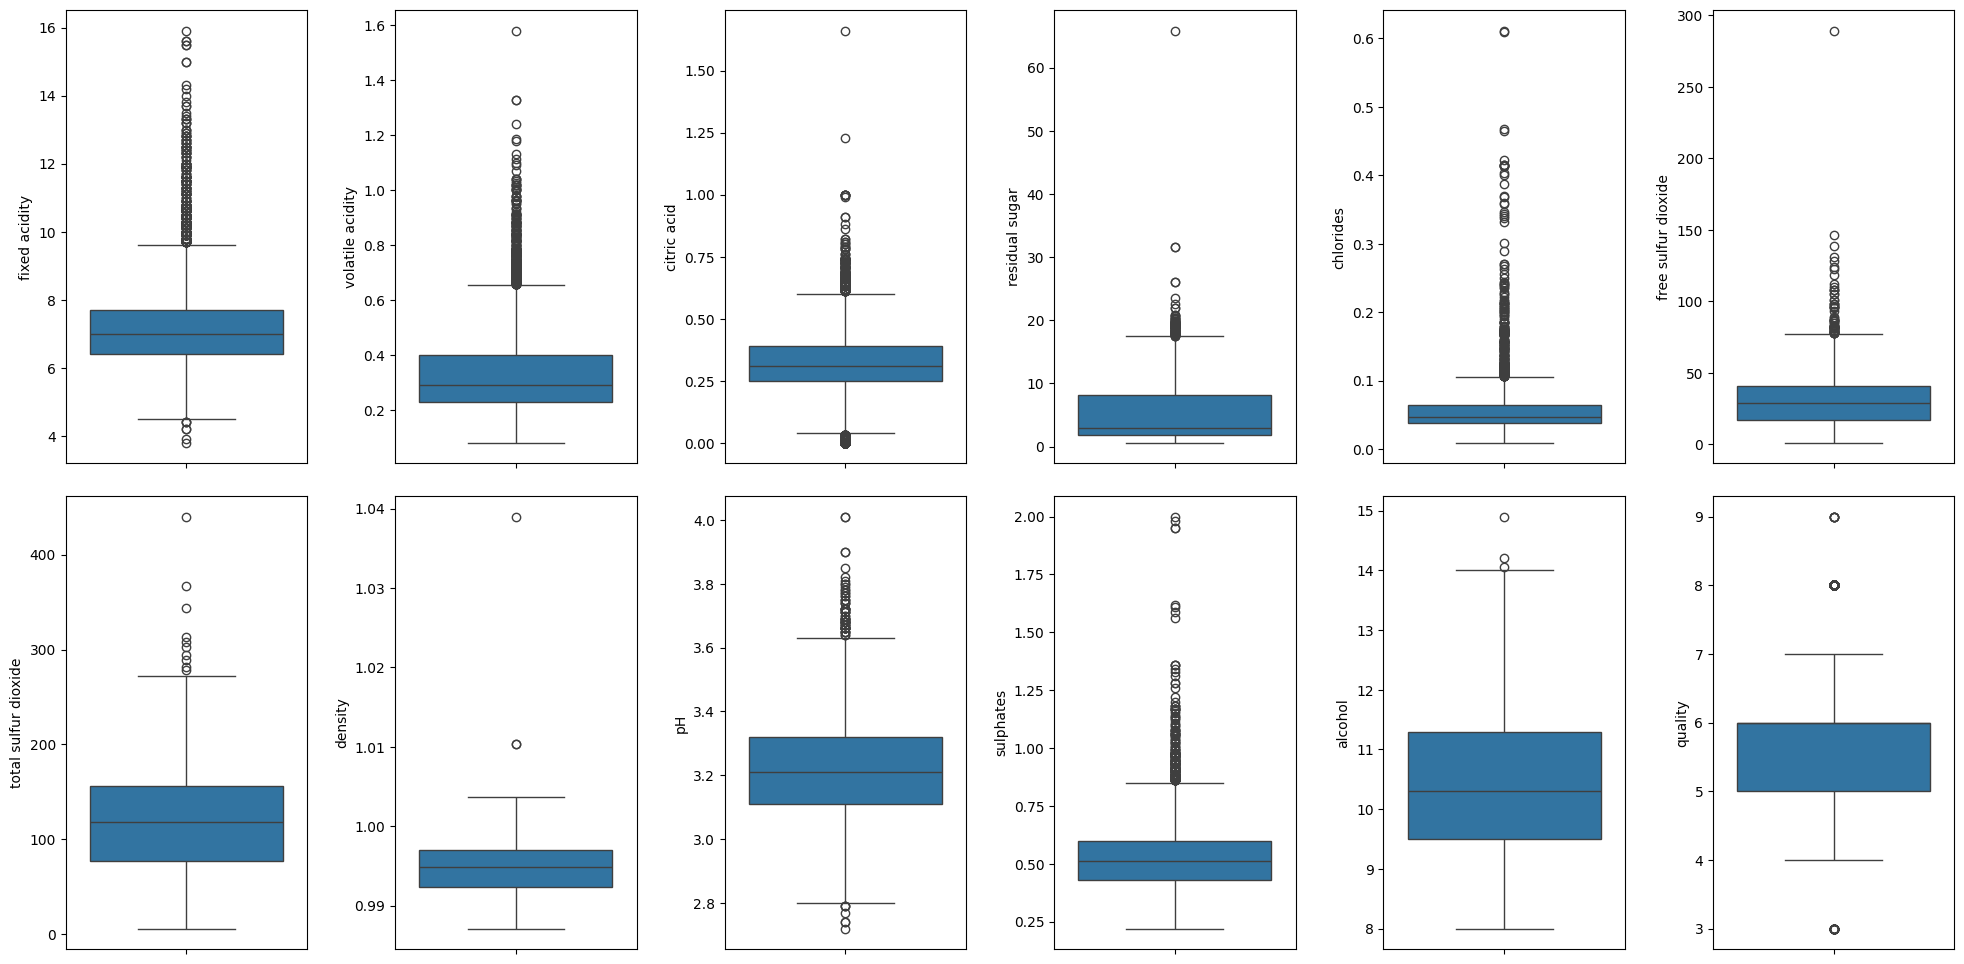

In [40]:
fig, ax= plt.subplots(2,6, figsize=(20,10))
index=0
ax=ax.flatten()
for i, j in data.items():
  if i != 'type':
    sns.boxplot(data=data, y=i, ax=ax[index])
    index+=1
    plt.tight_layout(pad=2)

In [13]:
'''q1= data['citric acid'].quantile(0.25)
q3=data['citric acid'].quantile(0.75)
iqr=q3-q1'''

In [14]:
'''upper_limit=q3 + (1.5*iqr)
lower_limit=q1 - (1.5*iqr)'''

In [15]:
#data.loc[(data['citric acid']>upper_limit)]=upper_limit
#data.loc[(data['citric acid']<lower_limit)]=lower_limit

In [16]:
#q1=data['residual sugar'].quantile(0.25)
#q3=data['residual sugar'].quantile(0.75)
#iqr=q3-q1

#upper_limit= q3 + (1.5*iqr)
#lower_limit= q1 - (1.5*iqr)

#data.loc[data['residual sugar']>upper_limit]=upper_limit
#data.loc[data['residual sugar']<lower_limit]=lower_limit

In [17]:
#q1=data['free sulfur dioxide'].quantile(0.25)
#q3=data['free sulfur dioxide'].quantile(0.75)
#iqr=q3-q1

#upper_limit= q3 + (1.5*iqr)
#lower_limit= q1 - (1.5*iqr)

#data.loc[data['free sulfur dioxide']>upper_limit]=upper_limit
#data.loc[data['free sulfur dioxide']<lower_limit]=lower_limit

In [18]:
#q1=data['total sulfur dioxide'].quantile(0.25)
#q3=data['total sulfur dioxide'].quantile(0.75)
#iqr=q3-q1

#upper_limit= q3 + (1.5*iqr)
#lower_limit= q1 - (1.5*iqr)

#data.loc[data['total sulfur dioxide']>upper_limit]=upper_limit
#data.loc[data['total sulfur dioxide']<lower_limit]=lower_limit

In [19]:
#q1=data['density'].quantile(0.25)
#q3=data['density'].quantile(0.75)
#iqr=q3-q1

#upper_limit= q3 + (1.5*iqr)
#lower_limit= q1 - (1.5*iqr)

#data.loc[data['density']>upper_limit]=upper_limit
#data.loc[data['density']<lower_limit]=lower_limit

In [20]:
#q1=data['sulphates'].quantile(0.25)
##q3=data['sulphates'].quantile(0.75)
#iqr=q3-q1

#upper_limit= q3 + (1.5*iqr)
#lower_limit= q1 - (1.5*iqr)

#data.loc[data['sulphates']>upper_limit]=upper_limit
#data.loc[data['sulphates']<lower_limit]=lower_limit

In [21]:
#q1=data['quality'].quantile(0.25)
#q3=data['quality'].quantile(0.75)
#iqr=q3-q1

#upper_limit= q3 + (1.5*iqr)
#lower_limit= q1 - (1.5*iqr)

#data.loc[data['quality']>upper_limit]=upper_limit
#data.loc[data['quality']<lower_limit]=lower_limit

In [22]:
#q1=data['pH'].quantile(0.25)
#q3=data['pH'].quantile(0.75)
#iqr=q3-q1

#upper_limit= q3 + (1.5*iqr)
#lower_limit= q1 - (1.5*iqr)

#data.loc[data['pH']>upper_limit]=upper_limit
#data.loc[data['pH']<lower_limit]=lower_limit

In [23]:
#q1=data['chlorides'].quantile(0.25)
#q3=data['chlorides'].quantile(0.75)
#iqr=q3-q1

#upper_limit= q3 + (1.5*iqr)
#lower_limit= q1 - (1.5*iqr)

#data.loc[data['chlorides']>upper_limit]=upper_limit
#data.loc[data['chlorides']<lower_limit]=lower_limit

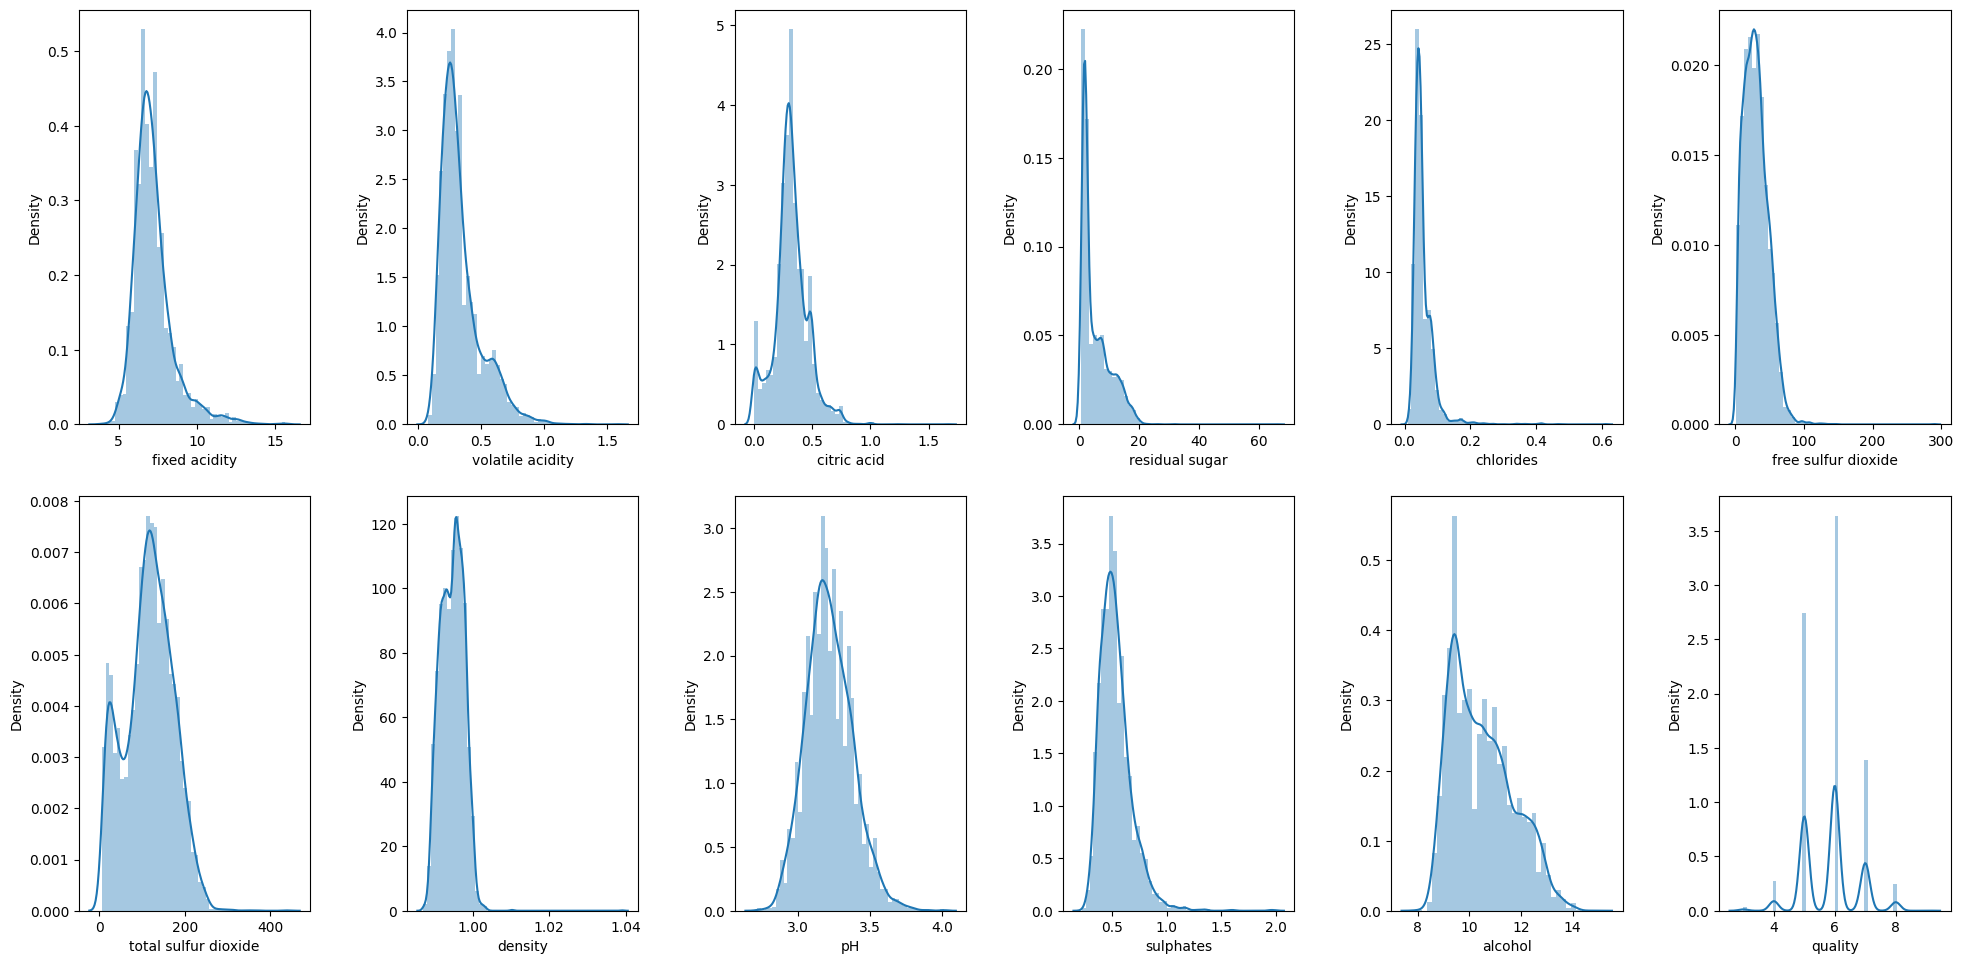

In [41]:
fig, ax= plt.subplots(2,6, figsize=(20,10))
index=0
ax=ax.flatten()
for i, j in data.items():
  if i != 'type':
   # sns.distplot(data=data,y=j, ax=ax[index])
   sns.distplot(j, ax=ax[index])
   index+=1
   plt.tight_layout(pad=2)

In [25]:
data['type'].value_counts()

type
white                  4254
red                    1161
0.14650000000000002    1082
Name: count, dtype: int64

# Co-orilation matrix


<Axes: >

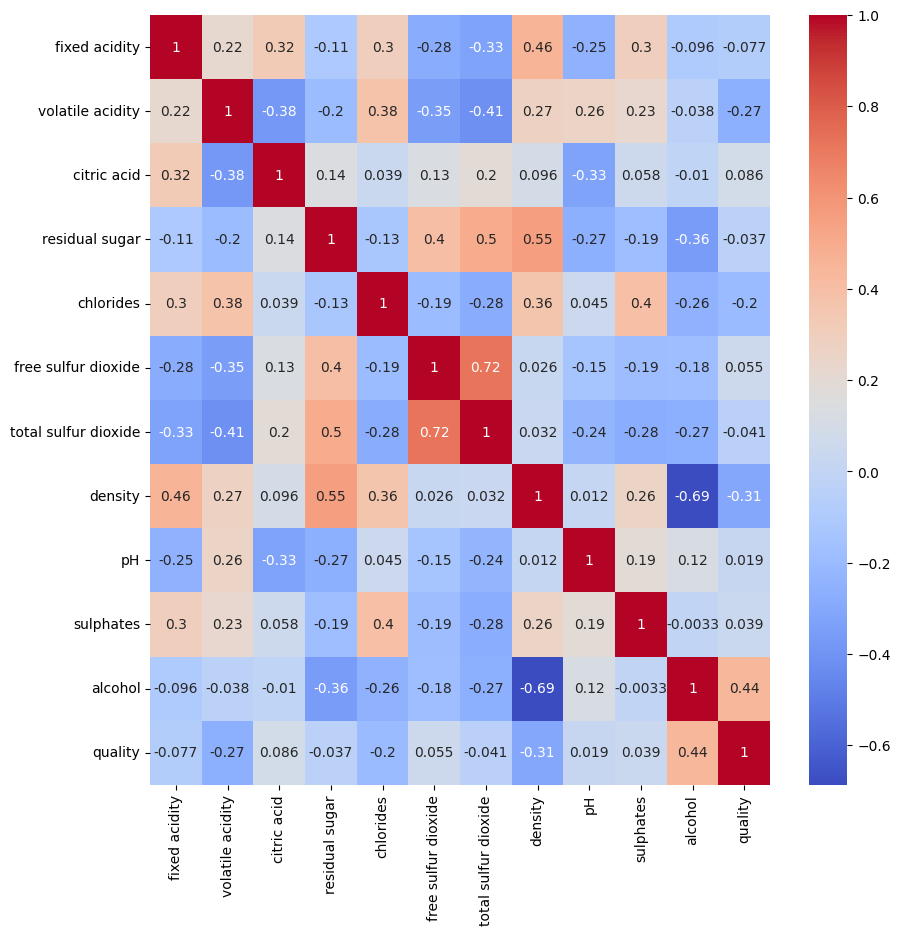

In [42]:
data1=data.drop('type', axis=1)
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(),annot=True, cmap='coolwarm')

In [55]:
X= data.drop(columns=['quality', 'type'])
y= data['quality']

In [56]:
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X,y):
  X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=42)

  #train the model
  model.fit(X_train, y_train)
  print('Accuracy_score:', model.score(X_test,y_test)*100)

  score=cross_val_score(model, X, y, cv=5)
  print('cv_score:', np.mean(score)*100)

In [57]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model, X, y)

Accuracy_score: 46.892307692307696
cv_score: 45.60606383608693


In [58]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
classify(model, X, y)

Accuracy_score: 31.005439261258505
cv_score: 24.84099282123356
